In [86]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.animation as animation


plot_every = 50
Nx = 400
Ny = 100
tau = .53
Nt = 3000

#lattice speeds and weights
NL = 9
cxs = np.array([0, 0, 1, 1, 1, 0, -1, -1, -1])
cys = np.array([0, 1, 1, 0, -1, -1, -1, 0, 1])
weights = np.array([4/9, 1/9, 1/36, 1/9, 1/36, 1/9, 1/36,1 /9, 1/36])

F = np.ones((Ny, Nx, NL)) + 0.1 * np.random.randn(Ny, Nx, NL)
F[:, :, 3] = 2.3

cylinder = make_cylinder()
print(cylinder)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [87]:
def distance(x1, y1, x2, y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

def make_cylinder():
    cylinder = np.full((Ny, Nx), False)
    
    for y in range(Ny):
        for x in range(Nx):
            if(distance(Nx / 4, Ny / 2, x, y) < 13):
                cylinder[y][x] = True
                
    return cylinder

In [88]:
def update(frameNum, img, F, *args):
    for i, cx, cy in zip(range(NL), cxs, cys):
        F[:, :, i] = np.roll(F[:, :, i], cx, axis = 1)
        F[:, :, i] = np.roll(F[:, :, i], cy, axis = 0)
            
    bndryF = F[cylinder, :]
    bndryF = bndryF[:, [0, 5, 6, 7, 8, 1, 2, 3, 4]]

    rho = np.sum(F, 2)
    ux = np.sum(F * cxs, 2) / rho
    uy = np.sum(F * cys, 2) / rho
    

    F[cylinder, :] = bndryF
    ux[cylinder] = 0
    uy[cylinder] = 0

    #collision
    Feq = np.zeros(F.shape)
    for i, cx, cy, w in zip(range(NL), cxs, cys, weights):
        Feq[:, :, i] = rho * w* (
            1 + 3 * (cx*ux + cy*uy) + 9 * (cx*ux + cy*uy)**2 / 2 - 3 *(ux**2 + uy**2)/2
        )

    F = F + -(1/tau) * (F-Feq)
    
    density = np.sqrt(ux**2+uy**2)
    img.set_data(density)
    return img,


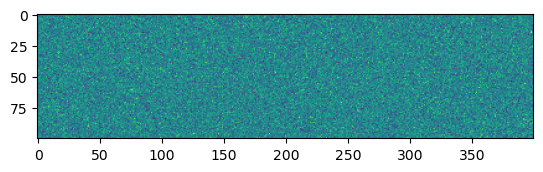

MovieWriter stderr:
[NULL @ 0x5644f5679e40] Unable to find a suitable output format for 'v2.hdf5'
v2.hdf5: Invalid argument



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '640x480', '-pix_fmt', 'rgba', '-r', '32', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', 'v2.hdf5']' returned non-zero exit status 1.

In [89]:
def main():

    #initial conditions
    
    
    rho = np.sum(F, 2)
    ux = np.sum(F * cxs, 2) / rho
    uy = np.sum(F * cys, 2) / rho
    density = np.sqrt(ux**2+uy**2)
    
    
                
    updateInterval = 10
    
    fig, ax = plt.subplots()
    img = ax.imshow(density)
    img.set_data(density)
    ani = animation.FuncAnimation(fig, update, fargs = (img, F), frames = 100, interval=updateInterval)
    
    plt.show()
    
#    writergif = animation.PillowWriter(fps=30)
#    ani.save('LIFE.gif', writer=writergif)

    ani.save('v2.xmf', writer = 'ffmpeg', fps = 32)
        
        
if __name__ == "__main__":
    main()